Link - https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
bank = pd.read_csv("ANZ synthesised transaction dataset.csv")

In [3]:
bank.head(n=6)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

#### Data Cleaning

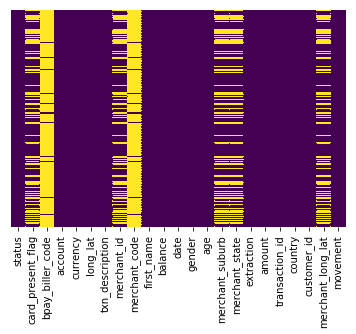

In [5]:
sns.heatmap(bank.isnull(),cbar=False,cmap="viridis",yticklabels=False)

*Removing Columns containing data less than 30% of the entire data*

In [ ]:
bank_ANZ = bank[[column for column in bank if bank[column].count()/len(bank) > 0.3]]
print("List of dropped columns: ")
for c in bank.columns:
    if c not in bank_ANZ.columns:
        print(c)

In [7]:
columns_to_drop = ["currency","country"]

In [8]:
bank_ANZ = bank_ANZ.drop(columns_to_drop,axis=1)

In [9]:
bank_ANZ = bank_ANZ.fillna(value="N.A")

In [10]:
bank_ANZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  12043 non-null  object 
 2   account            12043 non-null  object 
 3   long_lat           12043 non-null  object 
 4   txn_description    12043 non-null  object 
 5   merchant_id        12043 non-null  object 
 6   first_name         12043 non-null  object 
 7   balance            12043 non-null  float64
 8   date               12043 non-null  object 
 9   gender             12043 non-null  object 
 10  age                12043 non-null  int64  
 11  merchant_suburb    12043 non-null  object 
 12  merchant_state     12043 non-null  object 
 13  extraction         12043 non-null  object 
 14  amount             12043 non-null  float64
 15  transaction_id     12043 non-null  object 
 16  customer_id        120

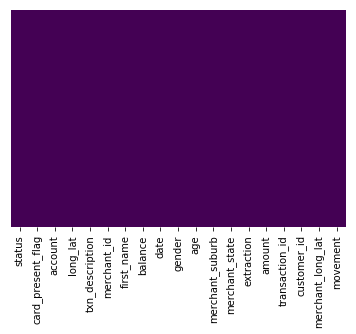

In [11]:
sns.heatmap(bank_ANZ.isnull(),cbar=False,cmap="viridis",yticklabels=False)

### Geographical Plotting

In [82]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [83]:
Authorized_data = bank_ANZ[bank_ANZ["merchant_id"] != "N.A"]
Authorized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             7717 non-null   object        
 1   card_present_flag  7717 non-null   object        
 2   account            7717 non-null   object        
 3   long_lat           7717 non-null   object        
 4   txn_description    7717 non-null   object        
 5   merchant_id        7717 non-null   object        
 6   first_name         7717 non-null   object        
 7   balance            7717 non-null   float64       
 8   date               7717 non-null   datetime64[ns]
 9   gender             7717 non-null   object        
 10  age                7717 non-null   int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         7717 non-null   object        
 14  amount 

In [84]:
Longitude = []
Latitude = []
for value in Authorized_data["merchant_long_lat"]:
    val = value.split(" ")
    Longitude.append(val[0])
    Latitude.append(val[1])

In [85]:
Authorized_data["Longitude"] = Longitude
Authorized_data["Latitude"] = Latitude

c:\users\harshit mittal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\harshit mittal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
Authorized_data["Longitude"] = Authorized_data["Longitude"].astype("float64").round(2)
Authorized_data["Latitude"] = Authorized_data["Latitude"].astype("float64").round(2)

c:\users\harshit mittal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\harshit mittal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
Victoria = gpd.read_file("Shape File Australia/AusVicPoly60.shp")

In [88]:
Queensland = gpd.read_file("Shape File Australia/Queensland.shp")

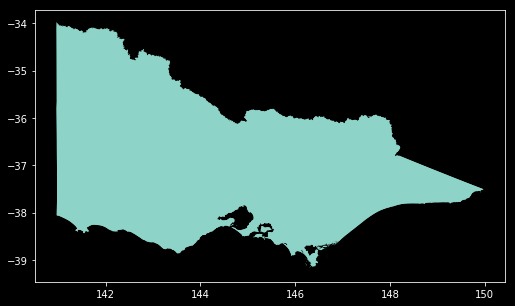

In [89]:
fig,ax = plt.subplots(figsize = (10,5))
Victoria.plot(ax=ax)

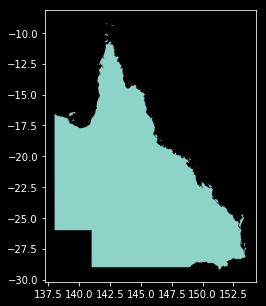

In [90]:
fig,ax = plt.subplots(figsize = (10,5))
Queensland.plot(ax=ax)

In [91]:
crs = {'init':"epsg:4326"}

In [92]:
geometry = [Point(xy) for xy in zip(Authorized_data["Longitude"],Authorized_data["Latitude"])]
geo_df = gpd.GeoDataFrame(Authorized_data,crs = crs ,geometry=geometry)

c:\users\harshit mittal\appdata\local\programs\python\python37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [93]:
geo_df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,Month,Longitude,Latitude,geometry
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-01-08,F,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,January,153.38,-27.99,POINT (153.38000 -27.99000)
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-01-08,F,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,January,151.21,-33.87,POINT (151.21000 -33.87000)
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-01-08,M,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,January,151.21,-33.87,POINT (151.21000 -33.87000)
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-01-08,F,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,January,153.05,-26.68,POINT (153.05000 -26.68000)
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-01-08,F,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,January,153.44,-28.06,POINT (153.44000 -28.06000)


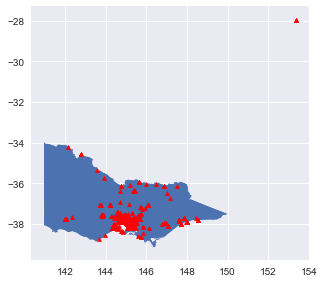

In [94]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (5,5))
Victoria.plot(ax=ax)
geo_df[geo_df["merchant_state"] == "VIC"].plot(ax=ax,markersize = 20,color = "red",marker = "^")

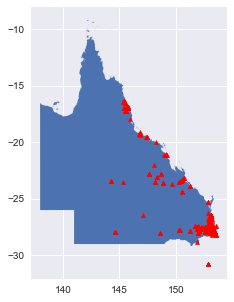

In [95]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (5,5))
Queensland.plot(ax=ax)
geo_df[geo_df["merchant_state"] == "QLD"].plot(ax=ax,markersize = 20,color = "red",marker = "^")

In [128]:
Australia = gpd.read_file("Shape File Australia/Australia_Polygon.shp")

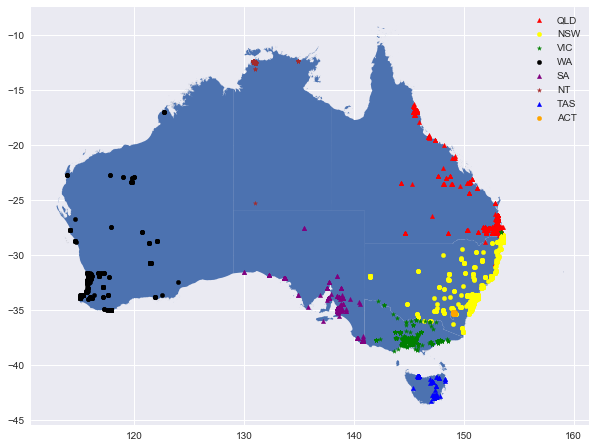

In [132]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (10,10))
Aus.plot(ax=ax)
geo_df[geo_df["merchant_state"] == "QLD"].plot(ax=ax,markersize = 20,color = "red",marker = "^",label="QLD")
geo_df[geo_df["merchant_state"] == "NSW"].plot(ax=ax,markersize = 20,color = "yellow",marker = "o",label="NSW")
geo_df[geo_df["merchant_state"] == "VIC"].plot(ax=ax,markersize = 20,color = "green",marker = "*",label="VIC")
geo_df[geo_df["merchant_state"] == "WA"].plot(ax=ax,markersize = 20,color = "black",marker = "o",label="WA")
geo_df[geo_df["merchant_state"] == "SA"].plot(ax=ax,markersize = 20,color = "purple",marker = "^",label="SA")
geo_df[geo_df["merchant_state"] == "NT"].plot(ax=ax,markersize = 20,color = "brown",marker = "*",label="NT")
geo_df[geo_df["merchant_state"] == "TAS"].plot(ax=ax,markersize = 20,color = "blue",marker = "^",label="TAS")
geo_df[geo_df["merchant_state"] == "ACT"].plot(ax=ax,markersize = 20,color = "orange",marker = "o",label="ACT")
plt.legend()

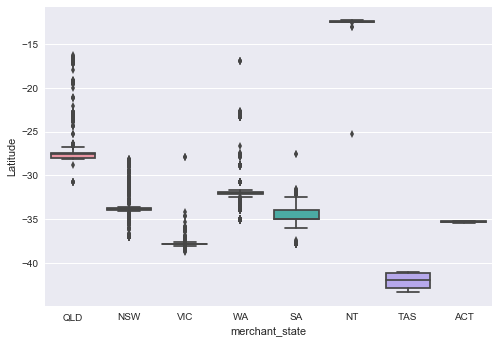

In [119]:
sns.boxplot(x="merchant_state",y="Latitude",data=Authorized_data)

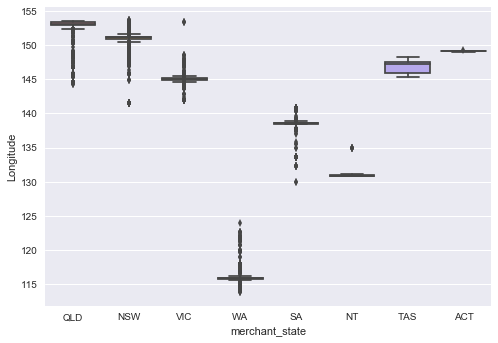

In [120]:
sns.boxplot(x="merchant_state",y="Longitude",data=Authorized_data)

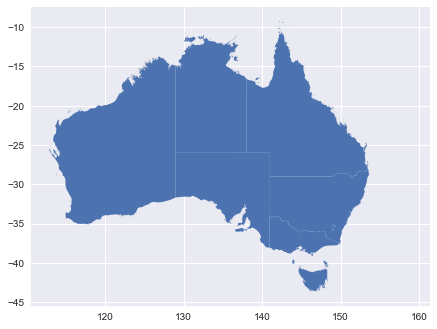

In [127]:
Aus= gpd.read_file("Shape File Australia/States Map.shp")
aus.plot()

In [194]:
Victoria = Authorized_data.groupby("merchant_state").get_group("VIC")

In [197]:
Victoria[Victoria["Latitude"] == -27.94]

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,Month,Longitude,Latitude,geometry
6804,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b27689af-4d1e-49b2-b3af-4139ac5d2b6c,Diana,2709.46,2018-09-22,F,...,2018-09-22T10:39:33.000+0000,8.44,ca6573025eb041e89c588796064bf604,CUS-2487424745,153.37 -27.94,debit,September,153.37,-27.94,POINT (153.37000 -27.94000)
7098,authorized,0,ACC-37709441,153.41 -28.01,POS,b27689af-4d1e-49b2-b3af-4139ac5d2b6c,Charles,13388.33,2018-09-24,M,...,2018-09-24T17:55:51.000+0000,11.66,20127dea0e2c418c82f7cd64d2d65d07,CUS-3336454548,153.37 -27.94,debit,September,153.37,-27.94,POINT (153.37000 -27.94000)
7214,authorized,0,ACC-1037050564,153.10 -27.66,POS,b27689af-4d1e-49b2-b3af-4139ac5d2b6c,Rhonda,4236.10,2018-09-25,F,...,2018-09-25T17:06:10.000+0000,17.24,f844e9adf7354d90bf8611164a9b23a4,CUS-1614226872,153.37 -27.94,debit,September,153.37,-27.94,POINT (153.37000 -27.94000)


In [198]:
Queensland = Authorized_data.groupby("merchant_state").get_group("QLD")

In [202]:
Queensland[Queensland["Latitude"] == -30.8]

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,Month,Longitude,Latitude,geometry
1016,authorized,1,ACC-240804743,121.48 -30.75,SALES-POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,4292.74,2018-08-08,M,...,2018-08-08T23:24:36.000+0000,16.15,c66c757f75004b0fa16f027d1af584e2,CUS-261674136,152.87 -30.8,debit,August,152.87,-30.8,POINT (152.87000 -30.80000)
4038,authorized,1,ACC-240804743,121.48 -30.75,POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,7570.06,2018-01-09,M,...,2018-09-01T19:39:09.000+0000,17.24,f9f908c893e24ccf8dbfdb781fbe90b9,CUS-261674136,152.87 -30.8,debit,January,152.87,-30.8,POINT (152.87000 -30.80000)
5827,authorized,1,ACC-240804743,121.48 -30.75,POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,11121.03,2018-09-14,M,...,2018-09-14T23:17:59.000+0000,16.67,bb894addac05426f926faa8eaa75eccc,CUS-261674136,152.87 -30.8,debit,September,152.87,-30.8,POINT (152.87000 -30.80000)
9204,authorized,1,ACC-240804743,121.48 -30.75,SALES-POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,18536.02,2018-10-10,M,...,2018-10-10T15:39:29.000+0000,18.12,cb1faf868dbc4b95a0425c10c3bcdf32,CUS-261674136,152.87 -30.8,debit,October,152.87,-30.8,POINT (152.87000 -30.80000)
9884,authorized,1,ACC-240804743,121.48 -30.75,SALES-POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,22769.13,2018-10-15,M,...,2018-10-15T12:42:07.000+0000,15.80,eb316e08583f45e69184ab56d75d2c38,CUS-261674136,152.87 -30.8,debit,October,152.87,-30.8,POINT (152.87000 -30.80000)
10629,authorized,1,ACC-240804743,121.48 -30.75,POS,41aa5103-841a-4f87-8cd2-577fe3e2b269,Kenneth,21962.80,2018-10-20,M,...,2018-10-20T21:45:07.000+0000,18.24,fc39f77ddd144680af7ad4a981acb77a,CUS-261674136,152.87 -30.8,debit,October,152.87,-30.8,POINT (152.87000 -30.80000)


### Exploratory Data Analysis

In [203]:
bank_ANZ.shape

(12043, 21)

In [12]:
bank_ANZ["date"] = pd.to_datetime(bank_ANZ.date)

In [13]:
bank_ANZ.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

In [217]:
bank_ANZ.groupby("status").card_present_flag.value_counts()

status      card_present_flag
authorized  1.0                  6194
            0.0                  1523
posted      N.A                  4326
Name: card_present_flag, dtype: int64

In [14]:
bank_ANZ.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

More Transactions done via merchants

In [15]:
bank_ANZ.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

More People complete transactions using online facilities

In [16]:
bank_ANZ.groupby("status").txn_description.value_counts()

status      txn_description
authorized  SALES-POS          3934
            POS                3783
posted      PAYMENT            2600
            PAY/SALARY          883
            INTER BANK          742
            PHONE BANK          101
Name: txn_description, dtype: int64

In [17]:
bank_ANZ.groupby("status").card_present_flag.value_counts()

status      card_present_flag
authorized  1.0                  6194
            0.0                  1523
posted      N.A                  4326
Name: card_present_flag, dtype: int64

In [18]:
bank_ANZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  12043 non-null  object        
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    12043 non-null  object        
 12  merchant_state     12043 non-null  object        
 13  extraction         12043 non-null  object        
 14  amount

In [19]:
bank_ANZ[['status','card_present_flag','txn_description','first_name','balance','amount','movement']].groupby("first_name").get_group("Diana")[:10]

,status,card_present_flag,txn_description,first_name,balance,amount,movement
0,authorized,1,POS,Diana,35.39,16.25,debit
1,authorized,0,SALES-POS,Diana,21.20,14.19,debit
4,authorized,1,SALES-POS,Diana,17.95,3.25,debit
20,authorized,1,POS,Diana,3.85,14.10,debit
72,posted,N.A,PAY/SALARY,Diana,1017.52,1013.67,credit
111,authorized,1,POS,Diana,1006.85,10.67,debit
117,authorized,0,SALES-POS,Diana,995.57,11.28,debit
129,authorized,0,POS,Diana,986.58,8.99,debit
132,authorized,1,POS,Diana,976.26,10.32,debit
167,authorized,1,SALES-POS,Diana,968.15,8.11,debit


In [158]:
bank_ANZ.groupby("first_name").movement.value_counts()

first_name  movement
Abigail     debit        89
            credit       13
Alexander   debit        85
            credit        6
Amy         debit       118
                       ... 
Tonya       credit        7
Tyler       debit       198
            credit       20
Virginia    debit       186
            credit       13
Name: movement, Length: 160, dtype: int64

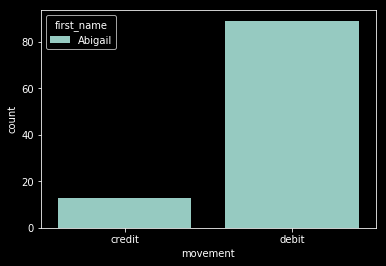

In [36]:
plt.style.use("dark_background")
sns.countplot(x="movement" , hue = "first_name" ,data = bank_ANZ[bank_ANZ["first_name"] == "Abigail"])

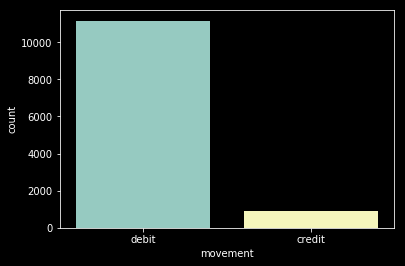

In [39]:
plt.style.use("dark_background")
sns.countplot(x="movement",data=bank_ANZ)

In [37]:
bank_ANZ.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

In [207]:
 Date = bank_ANZ.date.value_counts().idxmax()

In [215]:
bank_ANZ.date.value_counts().max()

174

In [210]:
Date.month_name()

'September'

In [214]:
Date

Timestamp('2018-09-28 00:00:00')

In [40]:
bank_ANZ["Month"] = bank_ANZ.date.dt.month_name()

In [181]:
bank_ANZ.date.dt.day_name().value_counts()

Saturday     1903
Friday       1841
Thursday     1781
Wednesday    1720
Monday       1683
Sunday       1618
Tuesday      1497
Name: date, dtype: int64

In [182]:
bank_ANZ["Weekday"] = bank_ANZ.date.dt.day_name()

In [41]:
bank_ANZ.groupby("Month").transaction_id.count()

Month
April         402
August       2750
December      412
February      405
January       377
July          371
June          381
March         426
May           417
November      394
October      2885
September    2823
Name: transaction_id, dtype: int64

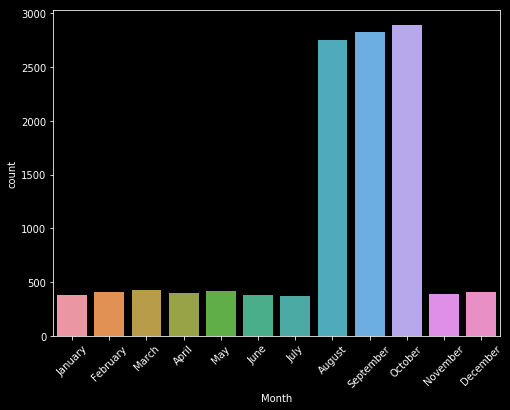

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x="Month",data=bank_ANZ)
plt.xticks(rotation=45)
plt.show()

In [186]:
bank_ANZ.groupby("Weekday").transaction_id.count()

Weekday
Friday       1841
Monday       1683
Saturday     1903
Sunday       1618
Thursday     1781
Tuesday      1497
Wednesday    1720
Name: transaction_id, dtype: int64

In [188]:
bank_ANZ.groupby("Weekday").status.value_counts()

Weekday    status    
Friday     authorized    1139
           posted         702
Monday     authorized     980
           posted         703
Saturday   authorized    1339
           posted         564
Sunday     authorized    1158
           posted         460
Thursday   authorized    1144
           posted         637
Tuesday    authorized     919
           posted         578
Wednesday  authorized    1038
           posted         682
Name: status, dtype: int64

In [65]:
bank_ANZ[bank_ANZ["merchant_state"] != "N.A"]["merchant_state"].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

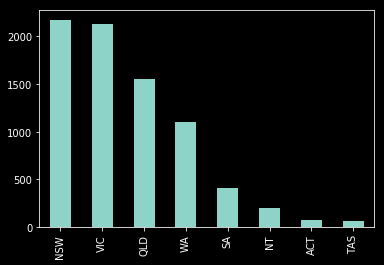

In [66]:
bank_ANZ[bank_ANZ["merchant_state"] != "N.A"]["merchant_state"].value_counts().plot(kind="bar")

In [97]:
len(bank_ANZ.merchant_suburb.unique())

1610

In [69]:
bank_ANZ.groupby("merchant_state").get_group("VIC").merchant_suburb.value_counts()

Melbourne         255
Ringwood           34
Castlemaine        33
Doncaster          31
Preston            30
                 ... 
Aberfeldie          1
Maidstone           1
Oakleigh South      1
Whittlesea          1
Corio               1
Name: merchant_suburb, Length: 370, dtype: int64

In [125]:
bank_ANZ.groupby("first_name").balance.agg(["mean","max","min"]).astype("int64")

,mean,max,min
first_name,,,
Abigail,11747,21213,1619
Alexander,14156,22337,5362
Amy,3397,6988,4
Andrew,54240,58535,49743
Antonio,5551,9378,378
...,...,...,...
Tim,65420,85890,53811
Timothy,5993,10064,2314
Tonya,5854,11553,49


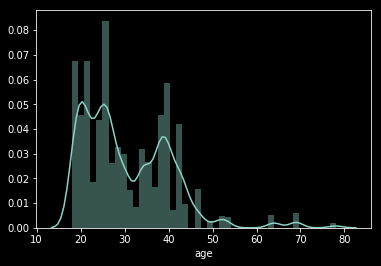

In [72]:
sns.distplot(bank_ANZ.age)

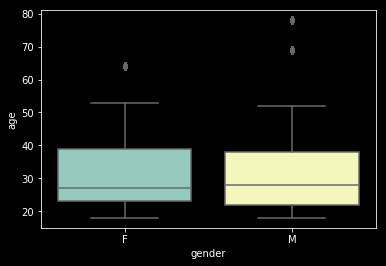

In [74]:
sns.boxplot(x="gender",y="age",data=bank_ANZ)

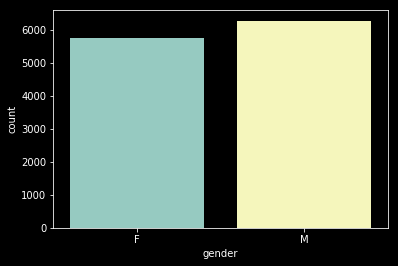

In [75]:
sns.countplot(x="gender",data=bank_ANZ)

In [77]:
bank_ANZ.groupby("gender").status.value_counts()

gender  status    
F       authorized    3862
        posted        1896
M       authorized    3855
        posted        2430
Name: status, dtype: int64

In [134]:
bank_ANZ.groupby("gender").balance.agg(["mean","max","min"]).round(2)

,mean,max,min
gender,,,
F,12061.26,208926.10,0.24
M,17125.52,267128.52,0.25


In [81]:
bank_ANZ.groupby("gender").transaction_id.count()

gender
F    5758
M    6285
Name: transaction_id, dtype: int64

In [136]:
bank_ANZ.groupby("movement").amount.mean()

movement
credit    1898.728029
debit       52.572343
Name: amount, dtype: float64

In [143]:
bank_ANZ.groupby("movement").amount.quantile(.75)

movement
credit    2538.68
debit       45.00
Name: amount, dtype: float64

In [145]:
bank_ANZ.groupby("movement").amount.agg(["quantile","max","min"])

,quantile,max,min
movement,,,
credit,1626.48,8835.98,576.0
debit,26.93,7081.09,0.1


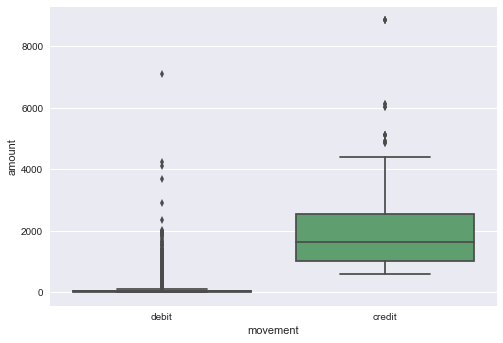

In [138]:
sns.boxplot(x="movement",y="amount",data=bank_ANZ)

In [159]:
Michael = bank_ANZ.groupby("first_name").get_group("Michael")

In [160]:
Michael.shape

(746, 20)

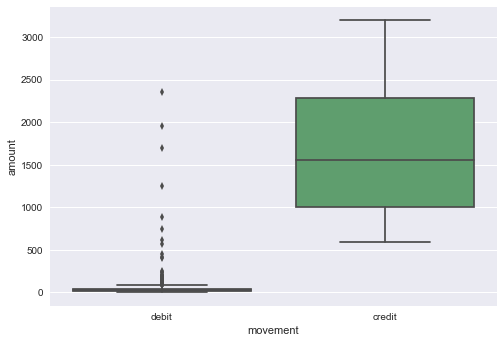

In [161]:
sns.boxplot(x="movement",y="amount",data=Michael)

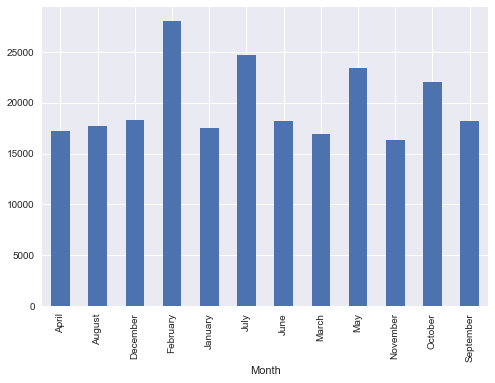

In [167]:
Michael.groupby("Month").balance.mean().plot(kind="bar")